## Computational Methods - Homework 3
### Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808  

Use the scipy.misc.derivative package find the derivative of the following function: 

################

def myfunc(x,a):

    return a*np.sin(x)
    
################

where 'a' is an arbitrary variable passed to the scipy routine

*hint: read the documentation of the scipy.misc.derivative and check how one can pass arguments to the fuction

Plot the function, the derivative and compare with analytical results of the function for a=1.

## Defining myfunc function

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [155]:
def myfunc(x,a):
    '''
    Parameter:
    ----------
    x: numpy array, float or int.
    a: float or int.
    
    Returns:
    ----------
    a*np.sin(x): numpy array, float or int.
    '''
    return a*np.sin(x)

## Testing misc.derivative

In [156]:
xt=np.asarray([0,np.pi/6,np.pi/4,np.pi/3,np.pi/2])
misc.derivative(myfunc,xt,dx=0.1,args=(1,))  #args must be an iterable object, like a tuple or a list.

array([0.99833417, 0.86458275, 0.70592886, 0.49916708, 0.        ])

 ## Numerical Derivative vs Analytical Derivative

Analytical derivative:
    
$$f'(x)=\frac{d \left ( asin(x) \right)}{dx}=acos(x) $$

In [157]:
def myfuncprime(x,a):
    '''
    Parameter:
    ----------
    x: numpy array, float or int.
    a: float or int.
    
    Returns:
    ----------
    a*np.cos(x): numpy array or float.
    '''
    return a*np.cos(x)

Numerical derivative:

In [158]:
def myfuncnumerical(f,x,Δx,a):
    '''
    Parameter:
    ----------
    f: python function.
    x: numpy array, float or int.
    Δx: float or int.
    a: float or int.
    
    Returns:
    ----------
    misc.derivative(f,x,dx=Δx,args=(a,)): numpy array or float.
    '''
    return misc.derivative(f,x,dx=Δx,args=(a,))

Let's plotting the analytical derivative and the numerical derivative:

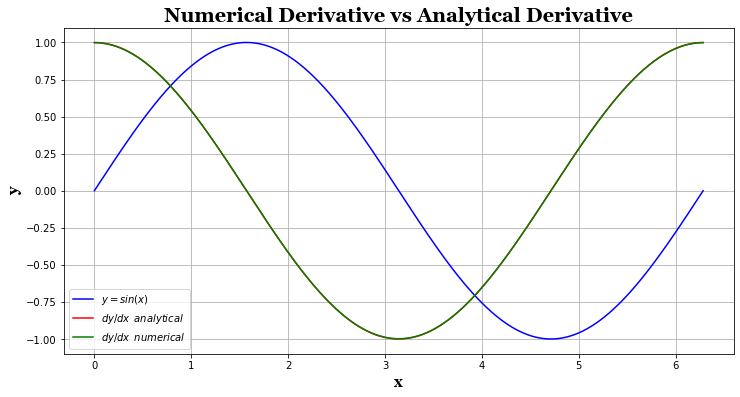

In [159]:
x=np.linspace(0,2*np.pi,1000)
y=myfunc(x,a=1)
ypa=myfuncprime(x,a=1)  #yprime analytical
ypn=myfuncnumerical(myfunc,x,0.1,1)  #yprime numerical

plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Numerical Derivative vs Analytical Derivative',**font1)
plt.plot(x,y,label='$y=sin(x)$',color='blue')
plt.plot(x,ypa,label='$dy/dx \enspace analytical$',color='red')
plt.plot(x,ypn,label='$dy/dx \enspace numerical$',color='green')
plt.xlabel('x',**font2)
plt.ylabel('y',**font2)
plt.legend()
plt.grid()
plt.show()

It is not possible to see the difference between analytical and numerical derivatives on this scale, but It is if zooming in enough.

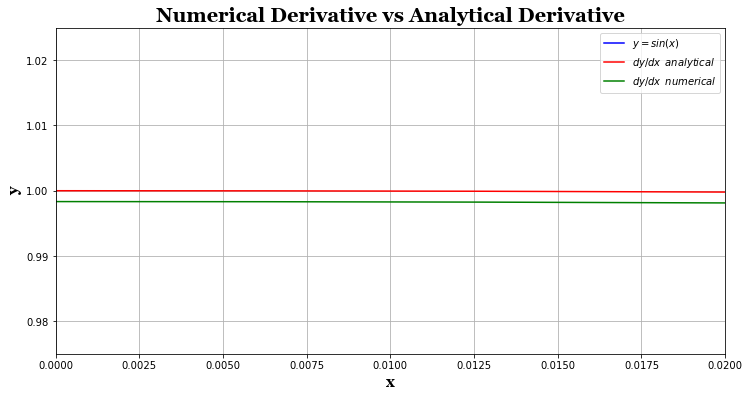

In [160]:
x=np.linspace(0,2*np.pi,1000)
y=myfunc(x,a=1)
ypa=myfuncprime(x,a=1)  #yprime analytical
ypn=misc.derivative(myfunc,x,dx=0.1,args=(1,))  #yprime numerical

plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Numerical Derivative vs Analytical Derivative',**font1)
plt.plot(x,y,label='$y=sin(x)$',color='blue')
plt.plot(x,ypa,label='$dy/dx \enspace analytical$',color='red')
plt.plot(x,ypn,label='$dy/dx \enspace numerical$',color='green')
plt.xlabel('x',**font2)
plt.ylabel('y',**font2)
plt.xlim(0,0.02)
plt.ylim(0.975,1.025)
plt.legend()
plt.grid()
plt.show()

Is dy/dx analytical always above dy/dx numerical?

In [161]:
ypa>ypn

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [162]:
xF=np.sort(x[ypa<=ypn])
print ('Interval in which the numerical derivative is above the analytical derivative: [{},{}]'.format(xF[0],xF[-1]))
print ('Interval in which the numerical derivative is below the analytical derivative: [{},{}]∪[{},{}]'.format(x[0],float(x[np.where(x==xF[0])[0]-1]),float(x[np.where(x==xF[-1])[0]+1]),x[-1]))

Interval in which the numerical derivative is above the analytical derivative: [1.5723686954903868,4.710816611689199]
Interval in which the numerical derivative is below the analytical derivative: [0.0,1.5660792207084253]∪[4.71710608647116,6.283185307179586]


## Numerical Derivative Error

Error:

In [163]:
def Error(x,f,Δx,a):
    '''
    Parameter:
    ----------
    f: python function.
    x: numpy array, float or int.
    Δx: float or int.
    a: float or int.
    
    Returns:
    ----------
    np.abs(myfuncprime(x,a)-myfuncnumerical(f,x,Δx,a)): numpy array or float.
    '''
    return np.abs(myfuncprime(x,a)-myfuncnumerical(f,x,Δx,a))

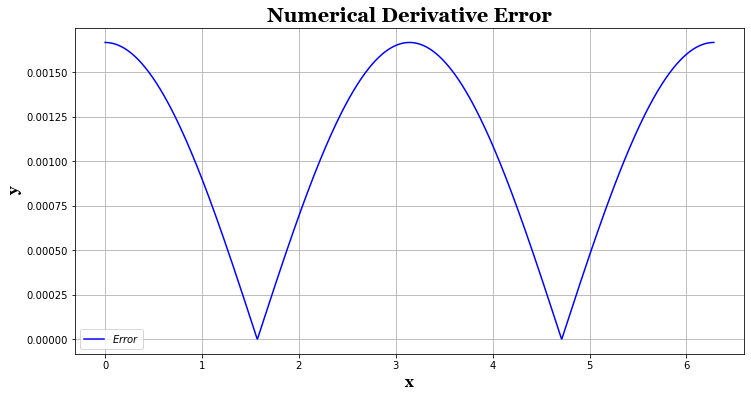

In [164]:
plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Numerical Derivative Error',**font1)
plt.plot(x,np.abs(ypa-ypn),label='$Error$',color='blue')
plt.xlabel('x',**font2)
plt.ylabel('y',**font2)
plt.legend()
plt.grid()
plt.show()

In general, the error is small, but there are points where it is maximum and others where it is minimum. Let's find some of those points.

In [165]:
from scipy import optimize

#x coordinates where the error is minimum
min1=optimize.minimize(Error,x0=1,args=(myfunc,0.1,1) ,method='SLSQP',tol=1E-8).x
min2=optimize.minimize(Error,x0=4,args=(myfunc,0.1,1) ,method='SLSQP',tol=1E-8).x

print('The error is minimum in x={} and x={}'.format(float(min1),float(min2)))

The error is minimum in x=1.5707926911907342 and x=4.712390166586577


To find the points where there is a maximum, let's define the ErrorN function as -Error.

In [167]:
def ErrorN(x,f,Δx,a):
    '''
    Parameter:
    ----------
    f: python function.
    x: numpy array, float or int.
    Δx: float or int.
    a: float or int.
    
    Returns:
    ----------
    -np.abs(myfuncprime(x,a)-myfuncnumerical(f,x,Δx,a)): numpy array or float.
    '''
    return -np.abs(myfuncprime(x,a)-myfuncnumerical(f,x,Δx,a))

In [168]:
#x coordinates where the error is maximum
max1=optimize.minimize(ErrorN,x0=0.1,args=(myfunc,0.1,1) ,method='SLSQP',tol=1E-8).x
max2=optimize.minimize(ErrorN,x0=3,args=(myfunc,0.1,1) ,method='SLSQP',tol=1E-8).x
max3=optimize.minimize(ErrorN,x0=6,args=(myfunc,0.1,1) ,method='SLSQP',tol=1E-8).x

print('The error is maximum in x={}, x={} and x={}'.format(float(max1),float(max2),float(max3)))

The error is maximum in x=-0.00020745732102125936, x=3.1421701531888537 and x=6.2831536971831685
